<a href="https://colab.research.google.com/github/parkmicheal1114/Python_Quest/blob/main/%EB%94%A5%ED%95%9C%EB%81%9D/%EB%94%A5%ED%95%9C%EB%81%9D_10_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

# 데이터 로드

In [2]:
(train_data , train_labels),(test_data,test_labels) = reuters.load_data(num_words =20000)

x_train , x_val , y_train , y_val = train_test_split(train_data , train_labels , test_size = 0.25 , random_state = 1234 )

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(test_data))
print(len(train_data))
print(len(set(train_labels)))


2110848/2110848 [==============================] - 1s 1us/step
6736
2246
2246
8982
46


# 전처리 ( 원- 핫 인코딩 )

In [3]:
# 텍스트 데이터 처리
def one_hot_encoding(data, dim=20000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train_oh = one_hot_encoding(x_train)
x_val_oh = one_hot_encoding(x_val)
test_data_oh = one_hot_encoding(test_data)

print(x_train_oh[0])
print(x_val_oh[1])

[0. 1. 0. ... 0. 0. 0.]
[0. 1. 0. ... 0. 0. 0.]


In [4]:
# 라벨링 데이터 전처리
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)

In [5]:
def reuter_model_making(x , y , x_val , y_val , acivation , opimizer , batch , epoch , drop):

  model = models.Sequential()
  model.add(layers.Input(shape = (20000,)))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(acivation))
  model.add(layers.Dropout(drop))
  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(acivation))
  model.add(layers.Dropout(drop))
  model.add(layers.Dense(46, activation='softmax', name='output'))

  model.compile(optimizer=opimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  model.summary()

  check_point_cb = callbacks.ModelCheckpoint('reuter_text.h5',
                                            save_best_only=True)

  early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

  history = model.fit(x, y, epochs = epoch, batch_size = batch,
                      validation_data=(x_val, y_val),
                      callbacks=[check_point_cb, early_stopping_cb])

  return history

In [6]:
history = reuter_model_making(x_train_oh , y_train , x_val_oh , y_val , 'relu' , 'Adam' , batch = 128 , epoch = 60, drop=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [7]:
history.history

{'loss': [1.8469126224517822,
  0.7420728802680969,
  0.43209534883499146,
  0.28708136081695557,
  0.21704530715942383,
  0.17346560955047607,
  0.15008774399757385,
  0.1227661743760109,
  0.11784078925848007,
  0.11441567540168762,
  0.10669214278459549,
  0.09968136250972748,
  0.10181733220815659,
  0.09897341579198837,
  0.09749526530504227,
  0.09310819208621979,
  0.09178493916988373],
 'accuracy': [0.6172803044319153,
  0.8366983532905579,
  0.9115201830863953,
  0.9392814636230469,
  0.9496734142303467,
  0.959916889667511,
  0.9614014029502869,
  0.9673396944999695,
  0.9668943285942078,
  0.9670427441596985,
  0.9677850604057312,
  0.9677850604057312,
  0.9670427441596985,
  0.9707541465759277,
  0.9677850604057312,
  0.970308780670166,
  0.970308780670166],
 'val_loss': [2.7542724609375,
  1.9937745332717896,
  1.4712508916854858,
  1.1478499174118042,
  0.9936683177947998,
  0.9346047639846802,
  0.9256359338760376,
  0.9327477216720581,
  0.9464565515518188,
  0.97139465

<ipython-input-8-0e9a20940c8e>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


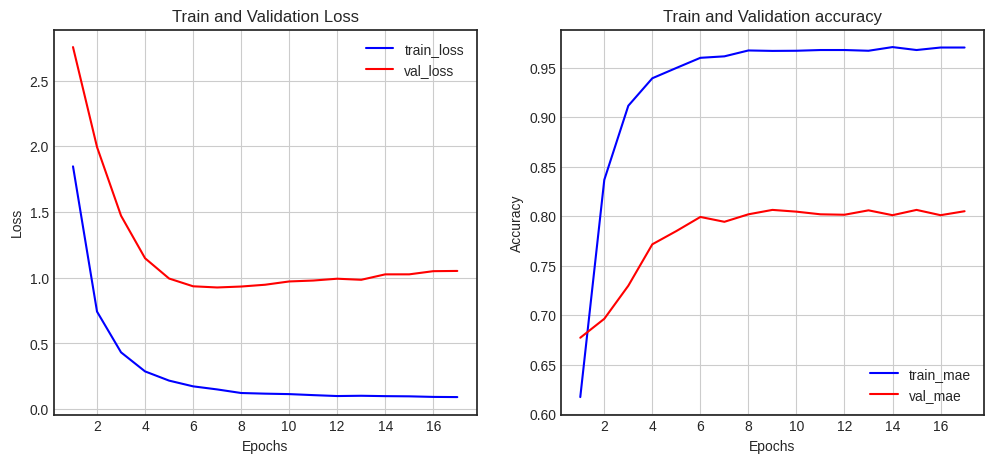

In [8]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['accuracy']
val_mae = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
history2 = reuter_model_making(x_train_oh , y_train , x_val_oh , y_val , 'relu' , 'rmsprop' , batch = 128 , epoch = 60, drop=0.3)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               2560128   
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                      

<ipython-input-10-12a2e63bd792>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


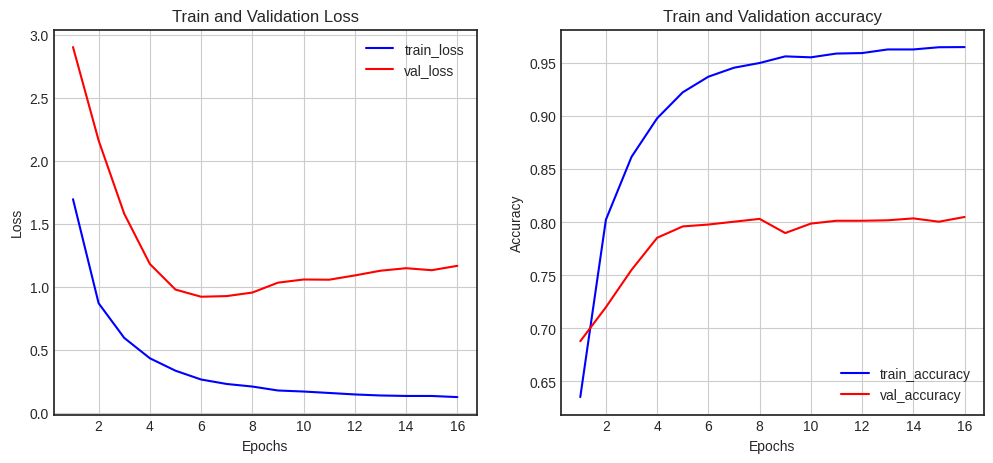

In [10]:
plt.style.use('seaborn-white')

history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['accuracy']
val_mae = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_accuracy')
ax2.plot(epochs, val_mae, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

rmsprop 보다 Adadm 이 더 적합 val_accuracy 에서 조금더 적합한 것 처럼 보인다.

In [11]:
history = reuter_model_making(x_train_oh , y_train , x_val_oh , y_val , 'relu' , 'Adam' , batch = 128 , epoch = 60, drop=0.3)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2560128   
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                      

<ipython-input-12-87392a9f1f1f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


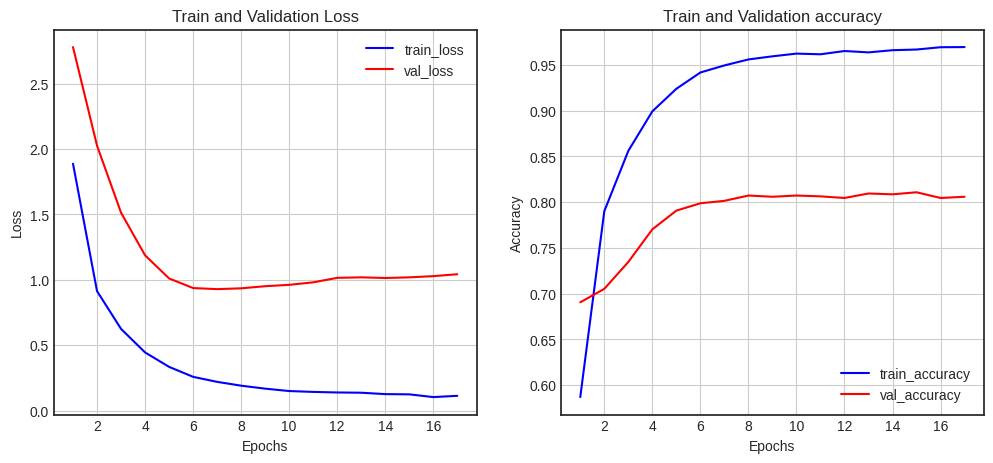

In [12]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['accuracy']
val_mae = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_accuracy')
ax2.plot(epochs, val_mae, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
test_label_cat = utils.to_categorical(test_labels)

In [14]:
# 모델 평가
model_reuter = models.load_model('reuter_text.h5')
model_reuter.evaluate(test_data_oh , test_label_cat , verbose = 1)

71/71 [==============================] - 0s 4ms/step - loss: 0.9446 - accuracy: 0.7974


[0.944585382938385, 0.7974176406860352]

In [15]:
# 모델 평가
pred = model_reuter.predict(test_data_oh)
from sklearn.metrics import classification_report

print(classification_report(np.argmax(test_label_cat , axis =-1),
                            np.argmax(pred , axis = -1)))


71/71 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.66      0.79      0.72       105
           2       0.74      0.70      0.72        20
           3       0.91      0.94      0.93       813
           4       0.83      0.89      0.86       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.64      0.74      0.68        38
           9       0.83      0.76      0.79        25
          10       0.84      0.90      0.87        30
          11       0.58      0.73      0.65        83
          12       0.50      0.15      0.24        13
          13       0.57      0.62      0.60        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.69     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


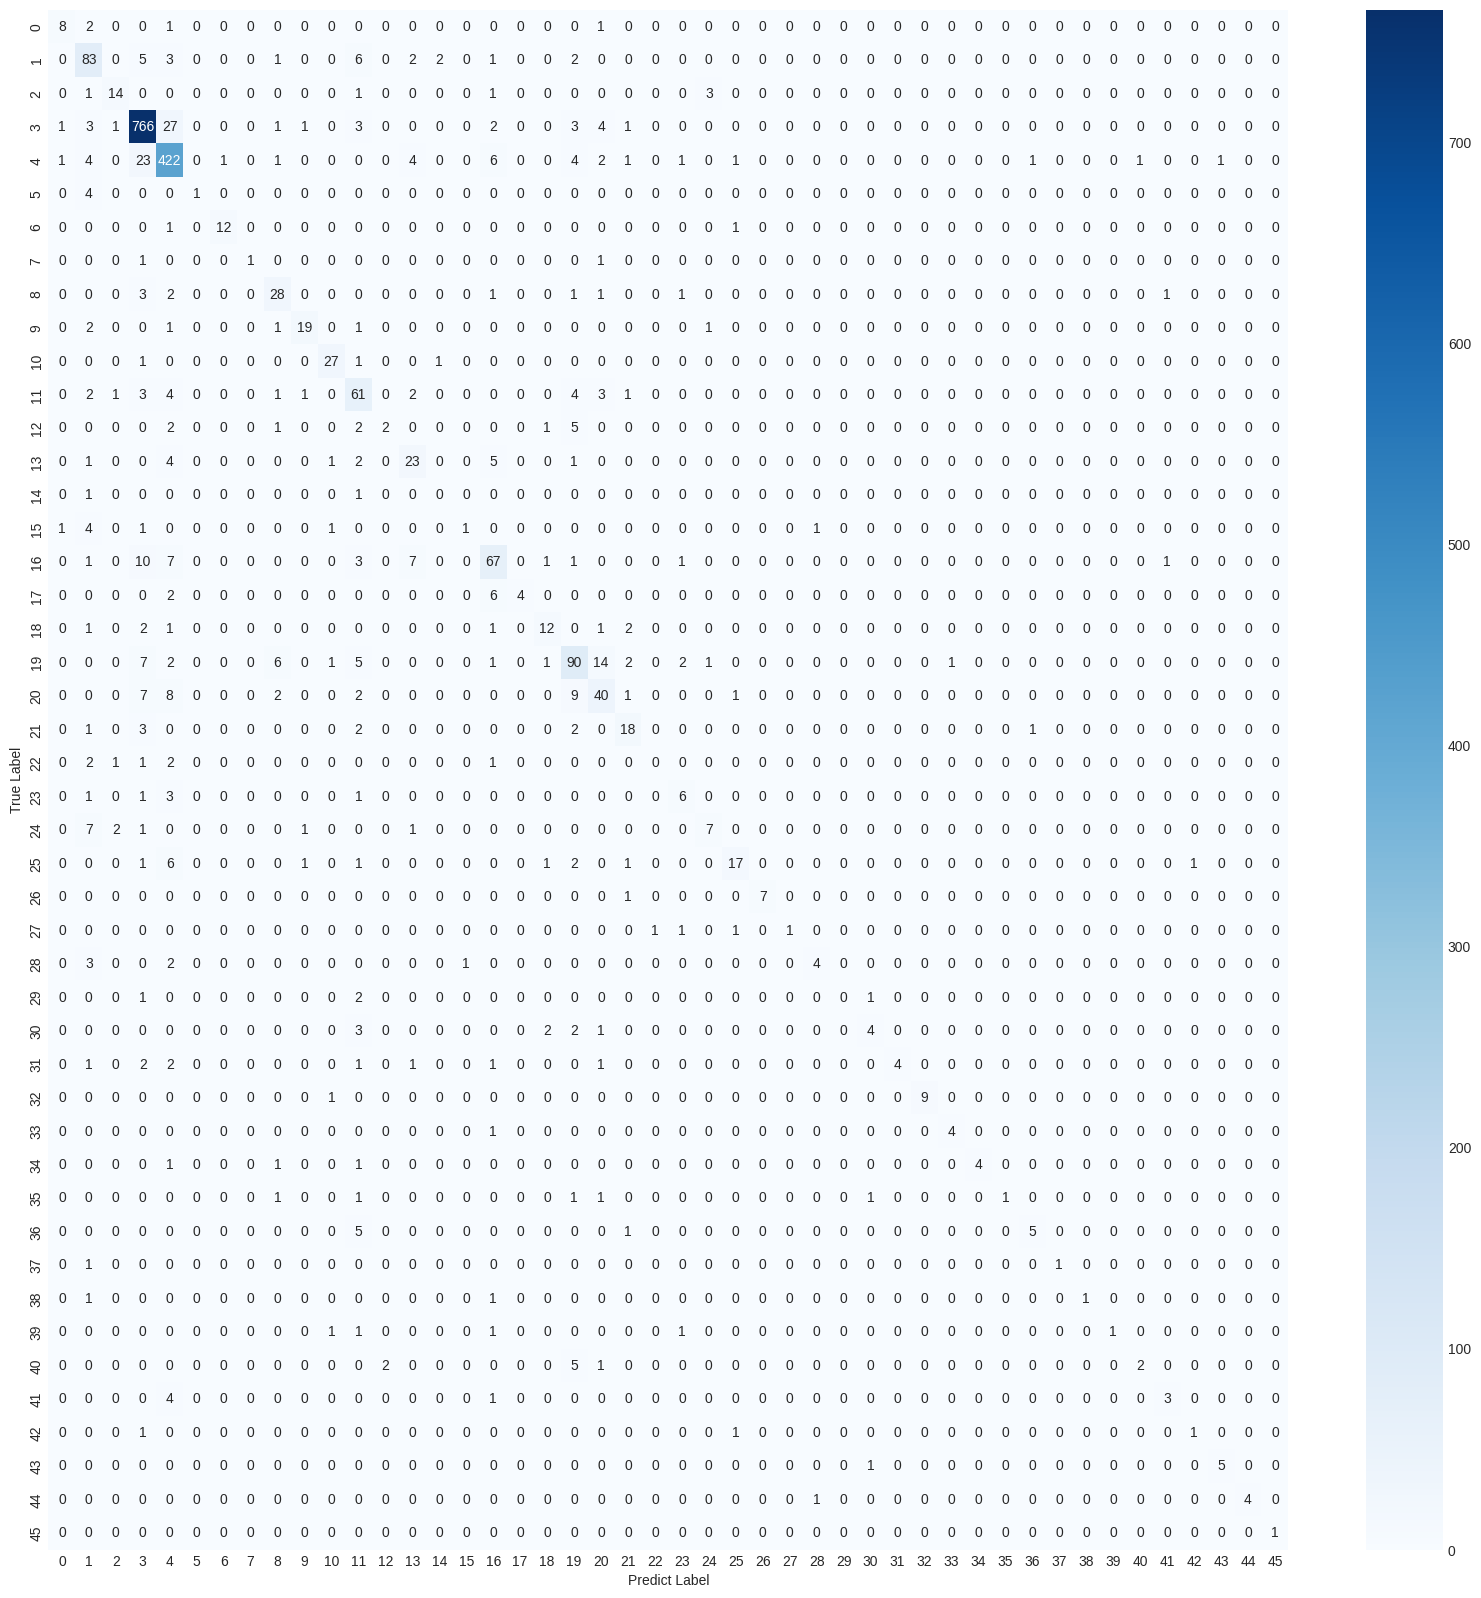

In [16]:
# confusion matrix 시각화
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (20,20))
cm2 = confusion_matrix(np.argmax(test_label_cat , axis = -1) , np.argmax(pred , axis = -1))
sns.heatmap(cm2 , annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predict Label')
plt.ylabel('True Label')
plt.show()